b'Start main dataset: bricks WINSIZE 1000\nLoading bricks\n\n\n0,0,0,0,-1,1,-1,1,-1,1,0,0,-2,2,-2,2,-2,2,0,0,-4,4,-4,4,-4,4,0,0,-8,8,-8,8,-8,8,0,0,-16,16,-16,16,-16,16,0,0,-1,1,0,0,-1,1,1,-1,-2,2,0,0,-2,2,2,-2,-4,4,0,0,-4,4,4,-4,-8,8,0,0,-8,8,8,-8,-16,16,0,0,-16,16,16,-16,\n\n0,0,3,2,5,4,7,6,9,8,11,10,13,12,15,14,17,16,19,18,21,20,23,22,25,24,27,26,29,28,31,30,33,32,35,34,37,36,39,38,41,40,\ninitialize memory pool 15000  208  272\ndone..\nprocess_batch 0 - 1000\nSaving data result/bricks/bin/flo_0_00000.bin, 0_0000\nSaving data result/bricks/bin/flo_1_00000.bin, 1_0000\nprocess_batch 1000 - 2000\nSaving data result/bricks/bin/flo_0_00001.bin, 0_0001\nSaving data result/bricks/bin/flo_1_00001.bin, 1_0001\nprocess_batch 2000 - 3000\nSaving data result/bricks/bin/flo_0_00002.bin, 0_0002\nSaving data result/bricks/bin/flo_1_00002.bin, 1_0002\nprocess_batch 3000 - 4000\nSaving data result/bricks/bin/flo_0_00003.bin, 0_0003\nSaving data result/bricks/bin/flo_1_00003.bin, 1_0003\nprocess_batc

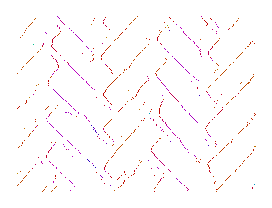

1


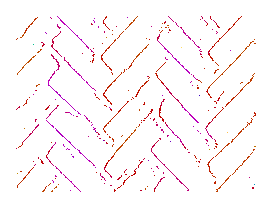

2


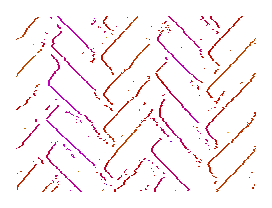

3


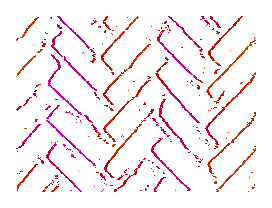

4


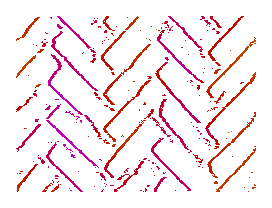

5


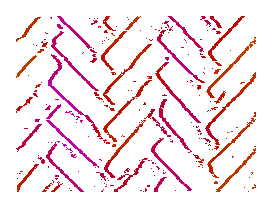

6


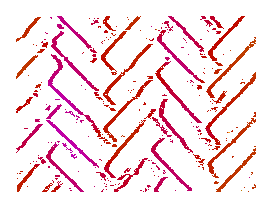

7


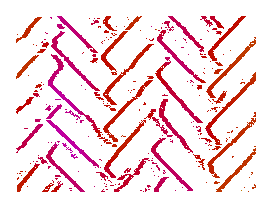

8


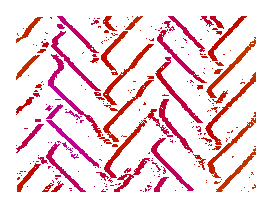

9


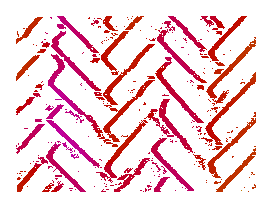

10


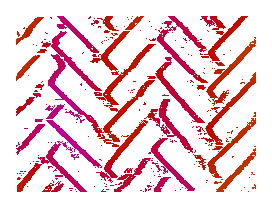

11


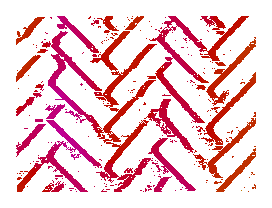

12


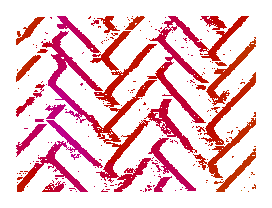

13


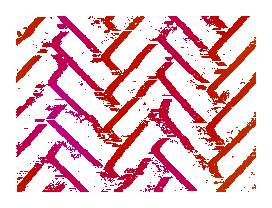

14


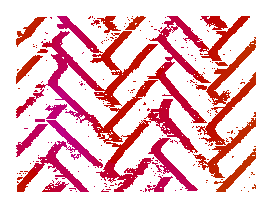

(208, 272, 2)


In [45]:

import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

# dataset = "dummy"
dataset = "bricks"
# dataset = "bricks_1slide"
# dataset = "indoor_flying2"

bin_path = 'result/{}/bin/flo_{:1d}_{:05d}.bin'
png_path = 'result/{}/png/flo_{:1d}_{:05d}.png'

if dataset=="indoor_flying2":
    B, W, H, C = 2921002, 368,288, 2
    n_itr_show = 10
    WINSIZE = 1000
    n_itr = B//WINSIZE
    # n_itr = 10 
else:
    B, W, H, C = 15000, 272,208, 2
    n_itr_show = 1
    WINSIZE = 1000
    n_itr   = B//WINSIZE

run_cpp= True
# n_itr = 10

if run_cpp:
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

for index in [0]:
    for itr in range(n_itr):
        if itr%n_itr_show==0:
            print(itr)
            bin_path_ = bin_path.format(dataset, index, itr)
            png_path_ = png_path.format(dataset, index, itr)
            flo = np.fromfile(bin_path_, dtype=np.float64).reshape([H,W,C])
            flow_vis.save_flo(flo, png_path_)
            display(Image(filename=png_path_)) 

print(flo.shape)

